# Graph

A graph has nodes and edges. The example below is a directed graph which means the edges have directions.

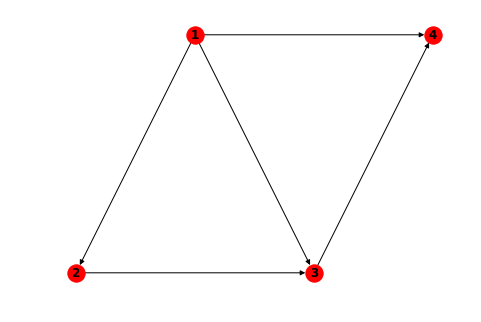

In [52]:
import matplotlib.pyplot as plt

import networkx as nx

G=nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1, 2, current='y1')
G.add_edge(2, 3, current='y2')
G.add_edge(1, 3, current='y3')
G.add_edge(1, 4, current='y4')
G.add_edge(3, 4, current='y5')
fixed_positions = {1:(0,0),2:(-1,-1),3:(1,-1),4:(2,0)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
nx.draw(G, pos, with_labels=True, font_weight='bold')


# Incidence Matrix

If we consider -1 as the edge goes out of a node and 1 as the edge goes into a node, and use rows to represent edges, we can create a matirx from the graph:

\begin{equation}A=\begin{vmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{vmatrix}\end{equation}

It's constructed with 0, 1 and -1.

## Ax=0

\begin{equation}A=\begin{vmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{vmatrix}\begin{vmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
\end{vmatrix}=\begin{vmatrix}
x_2 - x_1 \\
x_3 - x_2 \\
x_3 - x_1 \\
x_4 - x_1 \\
x_4 - x_3 \\
\end{vmatrix}=\begin{vmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
\end{vmatrix}\end{equation}

If we say x<sub>1</sub>,x<sub>2</sub>,x<sub>3</sub>,x<sub>4</sub> are potentials, then the rows of Ax are the potential differences on the edges.

The solution for this equation is `constant potential`: \begin{equation}x=c\begin{vmatrix}
1 \\
1 \\
1 \\
1 \\
\end{vmatrix}\end{equation}
The dimention of N(A) is 1.

if we say y<sub>1</sub>,y<sub>2</sub>,y<sub>3</sub>,y<sub>4</sub>,y<sub>5</sub> are currents, then we can see the Ohm's Law: \begin{equation}CAx=y\end{equation}, the constanct `C` is the conductance of the edge, one over the resistance.

## A<sup>T</sup>y=0

This is the most fundamental equation is applied mathematics.
If we still use the above example, then this equation becomes Kirchoff's Current Law, KCL.

The dimention of N(A<sup>T</sup>) is m - r = 5 - 3 = 2.

\begin{equation}A=\begin{vmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 1 \\
\end{vmatrix}\begin{vmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
\end{vmatrix}=\begin{vmatrix}
-y_1 - y_3 - y_4 \\
y_1 - y_2 \\
y_2 + y_3 - y5 \\
y_4 + y_5 \\
\end{vmatrix}=\begin{vmatrix}
0 \\
0 \\
0 \\
0 \\
\end{vmatrix}\end{equation}

{(1, 2): Text(-0.5,-0.5,"{'current': 'y1'}"),
 (1, 3): Text(0.5,-0.5,"{'current': 'y3'}"),
 (1, 4): Text(1,0,"{'current': 'y4'}"),
 (2, 3): Text(0,-1,"{'current': 'y2'}"),
 (3, 4): Text(1.5,-0.5,"{'current': 'y5'}")}

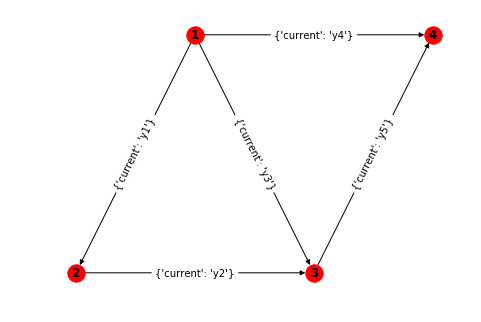

In [55]:
import matplotlib.pyplot as plt

import networkx as nx

G=nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1, 2, current='y1')
G.add_edge(2, 3, current='y2')
G.add_edge(1, 3, current='y3')
G.add_edge(1, 4, current='y4')
G.add_edge(3, 4, current='y5')
fixed_positions = {1:(0,0),2:(-1,-1),3:(1,-1),4:(2,0)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)
nx.draw(G, pos, with_labels=True, font_weight='bold')

edge_labels=dict([((u,v),d['current']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos, edge_labes=edge_labels)

KCL says for each node, currents in equals currents out, the net flow is 0.

The simplest basis of N(A<sup>T</sup>) is:

\begin{equation}\begin{vmatrix}1\\1\\-1\\0\\0\end{vmatrix},\begin{vmatrix}0\\0\\1\\-1\\1\end{vmatrix}\end{equation}

The two `loops`!

## What about C(A<sup>T</sup>)?

The dimention is r = 3.
Pick all the pivot columns in C(A<sup>T</sup>), it forms another smaller graph with same nodes but different edges.
The import thing is there's no loop in the graph! It's a `TREE`.


\begin{equation}dim(C(A^T)) = m -r\end{equation}

Because rank = n - 1 (N(A<sup>T</sup>) is one dimentional and the basis is all `1`), this equation is actually

\begin{equation}\#loops = \#edges - (\#nodes - 1)\end{equation} 

Rewrite the formula:

\begin{equation} \#nodes - \#edges + \#loops = 1 \end{equation} 
This count works for every graph and known as Euler's Formular.

## Summary

Portential differents: e = Ax

Currents : y = Ce

And we know the KCL: A<sup>T</sup> = 0

If we add external current source f, it becomes A<sup>T</sup> = f

By putting those above together, we get:

\begin{equation}A^TCAx=f\end{equation}

Please not that A<sup>T</sup>CA is always symmetric.